In [1]:
import pandas as pd
import numpy as np

from datetime import datetime

%matplotlib inline
pd.set_option('display.max_rows', 500)

In [47]:
data_path='../data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
pd_raw=pd.read_csv(data_path)

In [3]:
pd_raw

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20
0,NaN,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,...,2335,2469,2704,2894,3224,3392,3563,3778,4033,4402
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,782,789,795,803,820,832,842,850,856,868
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,4154,4295,4474,4648,4838,4997,5182,5369,5558,5723
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,745,747,748,750,751,751,752,752,754,755
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,30,35,35,35,36,36,36,43,43,45
5,NaN,Antigua and Barbuda,17.060800,-61.796400,0,0,0,0,0,0,...,25,25,25,25,25,25,25,25,25,25
6,NaN,Argentina,-38.416100,-63.616700,0,0,0,0,0,0,...,4532,4681,4783,4887,5020,5208,5371,5611,5776,6034
7,NaN,Armenia,40.069100,45.038200,0,0,0,0,0,0,...,2148,2273,2386,2507,2619,2782,2884,3029,3175,3313
8,Australian Capital Territory,Australia,-35.473500,149.012400,0,0,0,0,0,0,...,106,106,106,107,107,107,107,107,107,107
9,New South Wales,Australia,-33.868800,151.209300,0,0,0,0,3,4,...,3030,3035,3033,3035,3042,3044,3047,3051,3053,3053


In [48]:
time_idx =pd_raw.columns[4:]

In [49]:
print (time_idx)

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20',
       ...
       '5/1/20', '5/2/20', '5/3/20', '5/4/20', '5/5/20', '5/6/20', '5/7/20',
       '5/8/20', '5/9/20', '5/10/20'],
      dtype='object', length=110)


In [50]:
df_plot = pd.DataFrame({
    'date':time_idx})

df_plot.head()

,date
0,1/22/20
1,1/23/20
2,1/24/20
3,1/25/20
4,1/26/20


In [51]:
pd_raw['Country/Region']

0                           Afghanistan
1                               Albania
2                               Algeria
3                               Andorra
4                                Angola
5                   Antigua and Barbuda
6                             Argentina
7                               Armenia
8                             Australia
9                             Australia
10                            Australia
11                            Australia
12                            Australia
13                            Australia
14                            Australia
15                            Australia
16                              Austria
17                           Azerbaijan
18                              Bahamas
19                              Bahrain
20                           Bangladesh
21                             Barbados
22                              Belarus
23                              Belgium
24                                Benin


In [42]:
pd_raw[pd_raw['Country/Region']=='India'].iloc[:,4::].sum(axis=0)[0:4]

1/22/20    0
1/23/20    0
1/24/20    0
1/25/20    0
dtype: int64

In [52]:
country_list=['Italy',
              'US',
              'Spain',
              'Germany',
              'Korea, South',
             ] 

In [53]:
for each in country_list:
    df_plot[each]=np.array(pd_raw[pd_raw['Country/Region']==each].iloc[:,4::].sum(axis=0))

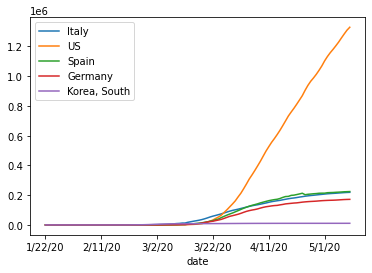

In [54]:
%matplotlib inline
df_plot.set_index('date').plot()

Data Type Data 


In [57]:
df_plot.max()

date             5/9/20
Italy            219070
US              1329260
Spain            224350
Germany          171879
Korea, South      10909
dtype: object

Converting US - Stadard

In [58]:
df_plot.date[0]

'1/22/20'

In [71]:
time_idx=[datetime.strptime( each,"%m/%d/%y") for each in df_plot.date] # convert to datetime
time_str=[each.strftime('%Y-%m-%d') for each in time_idx] # convert back to date ISO norm (str)

In [73]:
df_plot['date']=time_idx
type(df_plot['date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [75]:
df_plot


,date,Italy,US,Spain,Germany,"Korea, South"
0,2020-01-22,0,1,0,0,1
1,2020-01-23,0,1,0,0,1
2,2020-01-24,0,2,0,0,2
3,2020-01-25,0,2,0,0,2
4,2020-01-26,0,5,0,0,3
5,2020-01-27,0,5,0,1,4
6,2020-01-28,0,5,0,4,4
7,2020-01-29,0,5,0,4,4
8,2020-01-30,0,5,0,4,4
9,2020-01-31,2,7,0,5,11


Save the prossesed File 

In [77]:
df_plot.to_csv('../data/processed/COVID_small_flat_table.csv',sep=';',index=False)

Relational Data Model

In [78]:
data_path='../data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
pd_raw=pd.read_csv(data_path)
pd_raw.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,2335,2469,2704,2894,3224,3392,3563,3778,4033,4402
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,782,789,795,803,820,832,842,850,856,868
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,4154,4295,4474,4648,4838,4997,5182,5369,5558,5723
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,745,747,748,750,751,751,752,752,754,755
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,30,35,35,35,36,36,36,43,43,45


In [79]:
pd_data_base=pd_raw.rename(columns={'Country/Region':'country',
                      'Province/State':'state'})
pd_data_base['state']=pd_data_base['state'].fillna('no')  #ensure a sring, important for indexing

In [80]:
pd_data_base=pd_data_base.drop(['Lat','Long'],axis=1)
pd_data_base.head()

,state,country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20
0,no,Afghanistan,0,0,0,0,0,0,0,0,...,2335,2469,2704,2894,3224,3392,3563,3778,4033,4402
1,no,Albania,0,0,0,0,0,0,0,0,...,782,789,795,803,820,832,842,850,856,868
2,no,Algeria,0,0,0,0,0,0,0,0,...,4154,4295,4474,4648,4838,4997,5182,5369,5558,5723
3,no,Andorra,0,0,0,0,0,0,0,0,...,745,747,748,750,751,751,752,752,754,755
4,no,Angola,0,0,0,0,0,0,0,0,...,30,35,35,35,36,36,36,43,43,45


In [86]:
pd_data_base.set_index(['state','country']).T.head()


state            no                                                     \
country Afghanistan Albania Algeria Andorra Angola Antigua and Barbuda   
1/22/20           0       0       0       0      0                   0   
1/23/20           0       0       0       0      0                   0   
1/24/20           0       0       0       0      0                   0   
1/25/20           0       0       0       0      0                   0   
1/26/20           0       0       0       0      0                   0   

state                     Australian Capital Territory New South Wales  ...  \
country Argentina Armenia                    Australia       Australia  ...   
1/22/20         0       0                            0               0  ...   
1/23/20         0       0                            0               0  ...   
1/24/20         0       0                            0               0  ...   
1/25/20         0       0                            0               0  ...   
1/26/20         0       0                            0               3  ...   

state   Bonaire, Sint Eustatius and Saba     no Falkland Islands (Malvinas)  \
country                      Netherlands Malawi              United Kingdom   
1/22/20                                0      0                           0   
1/23/20                                0      0                           0   
1/24/20                                0      0                           0   
1/25/20                                0      0                           0   
1/26/20                                0      0                           0   

state   Saint Pierre and Miquelon          no                 \
country                    France South Sudan Western Sahara   
1/22/20                         0           0              0   
1/23/20                         0           0              0   
1/24/20                         0           0              0   
1/25/20                         0           0              0   
1/26/20                         0           0              0   

state                                                   
country Sao Tome and Principe Yemen Comoros Tajikistan  
1/22/20                     0     0       0          0  
1/23/20                     0     0       0          0  
1/24/20                     0     0       0          0  
1/25/20                     0     0       0          0  
1/26/20                     0     0       0          0  

[5 rows x 266 columns]

In [84]:
pd_relational_model=pd_data_base.set_index(['state','country']) \
                                .T                              \
                                .stack(level=[0,1])             \
                                .reset_index()                  \
                                .rename(columns={'level_0':'date',
                                                   0:'confirmed'},
                                                  )
pd_relational_model

,date,state,country,confirmed
0,1/22/20,Alberta,Canada,0.0
1,1/22/20,Anguilla,United Kingdom,0.0
2,1/22/20,Anhui,China,1.0
3,1/22/20,Aruba,Netherlands,0.0
4,1/22/20,Australian Capital Territory,Australia,0.0
...,...,...,...,...
29255,5/10/20,no,West Bank and Gaza,375.0
29256,5/10/20,no,Western Sahara,6.0
29257,5/10/20,no,Yemen,51.0
29258,5/10/20,no,Zambia,267.0


In [87]:
pd_relational_model.dtypes


date          object
state         object
country       object
confirmed    float64
dtype: object

In [88]:
pd_relational_model['date']=pd_relational_model.date.astype('datetime64[ns]')

In [89]:
pd_relational_model.confirmed=pd_relational_model.confirmed.astype(int)

pd_relational_model.to_csv('../data/processed/COVID_relational_confirmed.csv',sep=';',index=False)

In [91]:
print(pd_relational_model[pd_relational_model['country']=='India'].tail())


            date state country  confirmed
28088 2020-05-06    no   India      52987
28354 2020-05-07    no   India      56351
28620 2020-05-08    no   India      59695
28886 2020-05-09    no   India      62808
29152 2020-05-10    no   India      67161


For New 

In [92]:
data_path='../data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv'
pd_raw_US=pd.read_csv(data_path)
pd_raw_US.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.2710,-170.1320,...,0,0,0,0,0,0,0,0,0,0
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.4443,144.7937,...,145,145,145,145,145,149,149,151,151,151
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.0979,145.6739,...,14,14,14,14,14,15,15,15,16,16
3,630,PR,PRI,630,72.0,NaN,Puerto Rico,US,18.2208,-66.5901,...,1575,1757,1808,1843,1924,1968,2031,2156,2173,2198
4,850,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.3358,-64.8963,...,66,66,66,66,66,66,66,68,68,69


In [93]:

# drop all non relevant fields! 
# Many of this fields do not belong to 
# a transactional data. These fields belong to so called master data
pd_raw_US=pd_raw_US.drop(['UID', 'iso2', 'iso3', 'code3', 'Country_Region','FIPS', 'Admin2',  'Lat', 'Long_', 'Combined_Key'],axis=1)
pd_data_base_US=pd_raw_US.rename(columns={'Province_State':'state'}).copy()

In [95]:
#thin a stacking level
pd_relational_model_US=pd_data_base_US.set_index(['state']) \
                                .T                              \
                                .stack()             \
                                .reset_index()                  \
                                .rename(columns={'level_0':'date',
                                                   0:'confirmed'},
                                                  )
pd_relational_model_US['country']='US'
pd_relational_model_US['date']=[datetime.strptime( each,"%m/%d/%y") for each in pd_relational_model_US.date] # convert to datetime
pd_relational_model_US.head()

,date,state,confirmed,country
0,2020-01-22,American Samoa,0,US
1,2020-01-22,Guam,0,US
2,2020-01-22,Northern Mariana Islands,0,US
3,2020-01-22,Puerto Rico,0,US
4,2020-01-22,Virgin Islands,0,US


In [96]:
pd_relational_model_all=pd_relational_model[pd_relational_model['country']!='US'].reset_index(drop=True)

In [97]:
pd_relational_model_all=pd.concat([pd_relational_model_all,pd_relational_model_US],ignore_index=True)

In [98]:
pd_relational_model_all.to_csv('../data/processed/20200420_COVID_relational_confirmed.csv',sep=';',index=False)

In [99]:
print(pd_relational_model_all[pd_relational_model_all['country']=='US'])


             date                     state country  confirmed
29150  2020-01-22            American Samoa      US          0
29151  2020-01-22                      Guam      US          0
29152  2020-01-22  Northern Mariana Islands      US          0
29153  2020-01-22               Puerto Rico      US          0
29154  2020-01-22            Virgin Islands      US          0
...           ...                       ...     ...        ...
387855 2020-05-10                      Utah      US         28
387856 2020-05-10                      Utah      US         13
387857 2020-05-10                      Utah      US        164
387858 2020-05-10                      Utah      US         16
387859 2020-05-10                      Utah      US        194

[358710 rows x 4 columns]
